# Уменьшение палитры изображения
Для картинки нужно уменьшить число цветов в палитре.

Для этого нужно выделить **кластеры в пространстве RGB**, объекты соответствуют пикселям изображения. После выделения кластеров, все пиксели, отнесенные в один кластер, заполняются одним цветом; этот цвет может быть центроидом соответствующего кластера, медианным цветом по кластеру.

Рассмотренные алгоритмы кластеризации:

* KMeans
* DBSCAN
* AgglomerativeClustering



In [1]:
import matplotlib.pyplot as plt
import cv2 
import numpy as np
def draw_picture(image, bgr=False):
    b, g, r = cv2.split(image) # по умолчанию cv2 почему-то отдает цвета в порядке BGR вместо RGB!
    new_image = cv2.merge([r, g, b])
    plt.figure(figsize=(7, 5))
    plt.axis('off')
    plt.imshow(new_image)
    plt.show()

img - это обычный трехмерный массив цветов пикселей, где две первые координаты - это координаты каждого пикселя, и третья обозначает R, G или B.

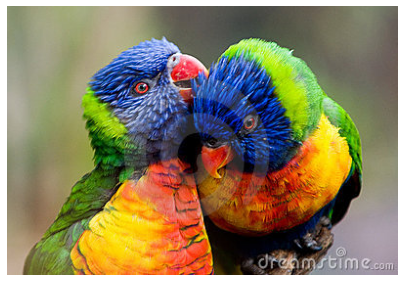

In [ ]:
img = cv2.imread('/birds.jpg') # считать картинку
draw_picture(img) # нарисовать картинку

# 1. K - means

In [2]:
from sklearn.cluster import KMeans
def KMeans_clust(img,n):
  img1 = np.copy(img)
  img1 = img1.reshape(img.shape[0]*img.shape[1], 3)
  model = KMeans(n_clusters=n)
  y_pred = model.fit_predict(img1)

  r,g,b =[],[],[]
  for i in range(n):
      r.append(round(sum(list(map(lambda x: x[0], img1[y_pred==i])))/len(img1[y_pred==i])))
      g.append(round(sum(list(map(lambda x: x[1], img1[y_pred==i])))/len(img1[y_pred==i])))
      b.append(round(sum(list(map(lambda x: x[2], img1[y_pred==i])))/len(img1[y_pred==i])))
      img1[y_pred==i] = list((r[i],g[i],b[i]))
  img1 = img1.reshape(img.shape[0], img.shape[1], 3)
  return img1

KMeans


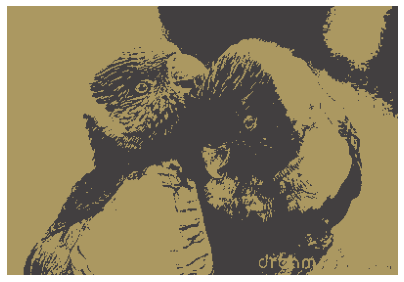

2 clusters None


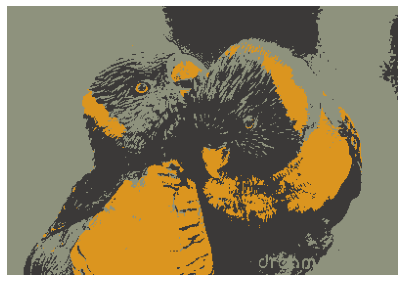

3 clusters None


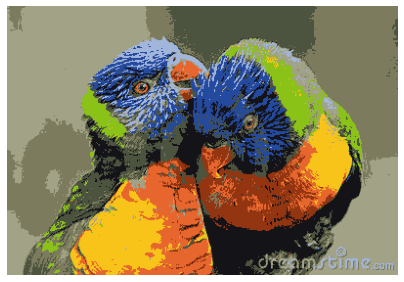

10 clusters None


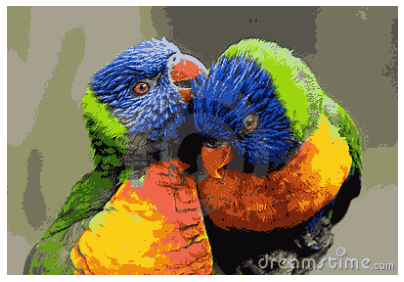

20 clusters None


In [ ]:
print('KMeans')
print('2 clusters', draw_picture(KMeans_clust(img,2)))
print('3 clusters', draw_picture(KMeans_clust(img,3)))
print('10 clusters', draw_picture(KMeans_clust(img,10)))
print('20 clusters', draw_picture(KMeans_clust(img,20)))

In [ ]:
from skimage.metrics import structural_similarity as ssim
print('KMeans, метрика SSIM')
print('2 кластера:', ssim(img, KMeans_clust(img,2), multichannel=True))
print('3 кластера:', ssim(img, KMeans_clust(img,3), multichannel=True))
print('10 кластера:', ssim(img, KMeans_clust(img,10), multichannel=True))
print('20 кластера:', ssim(img, KMeans_clust(img,20), multichannel=True))


KMeans, метрика SSIM
2 кластера: 0.5332928873500311
3 кластера: 0.5635481595568216
10 кластера: 0.6781000536040626
20 кластера: 0.759250800805288


# 2. DBSCAN

In [3]:
from sklearn.cluster import DBSCAN
def DBSCAN_clust(img,n,e):
  img1 = np.copy(img)
  img1 = img1.reshape(img.shape[0]*img.shape[1], 3)
  model = DBSCAN(min_samples=n, eps=e)
  y_pred = model.fit_predict(img1)

  r,g,b =[],[],[]
  for i in range(n):
    if len(img1[y_pred==i])!=0:
      r.append(round(sum(list(map(lambda x: x[0], img1[y_pred==i])))/len(img1[y_pred==i])))
      g.append(round(sum(list(map(lambda x: x[1], img1[y_pred==i])))/len(img1[y_pred==i])))
      b.append(round(sum(list(map(lambda x: x[2], img1[y_pred==i])))/len(img1[y_pred==i])))
      img1[y_pred==i] = list((r[i],g[i],b[i]))
  img1 = img1.reshape(img.shape[0], img.shape[1], 3)
  return img1

DBSCAN


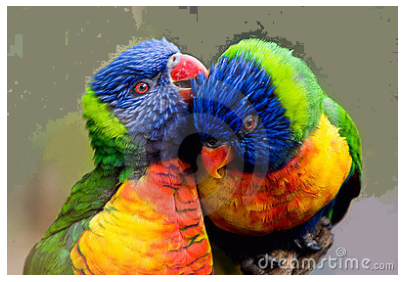

Минимальное количество соседей 20
метрика SSIM 0.92860043475957


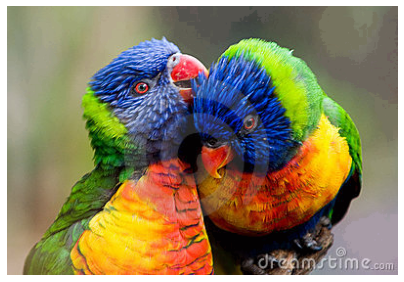

Минимальное количество соседей 100
метрика SSIM 0.9873669863019204


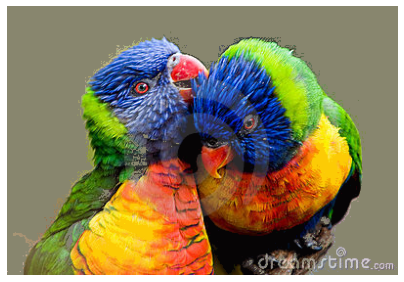

Увеличили расстояние, на котором две вершины считаются соседями до 5
метрика SSIM 0.9262895736471884


In [ ]:
print('DBSCAN')

draw_picture(DBSCAN_clast(img,20,2))
print('Минимальное количество соседей 20')
print('метрика SSIM',ssim(img, DBSCAN_clast(img,20,2), multichannel=True))

draw_picture(DBSCAN_clast(img,100,2))
print('Минимальное количество соседей 100')
print('метрика SSIM',ssim(img, DBSCAN_clast(img,100,2), multichannel=True))

draw_picture(DBSCAN_clast(img,100,5))
print('Увеличили расстояние, на котором две вершины считаются соседями до 5')
print('метрика SSIM',ssim(img, DBSCAN_clast(img,100,5), multichannel=True))

**Вывод:** при увеличении min_samples и уменьшении eps качество картинки растет,т.к. это ведет к увеличению кластеров

# 3. AgglomerativeClustering

In [4]:
from sklearn.cluster import AgglomerativeClustering
from skimage.transform import resize 
def Agglomerative_clust(img,n):
  img = resize(img, (128,128))
  img1 = np.copy(img)
  img1 = img1.reshape(img.shape[0]*img.shape[1], 3)
  model = AgglomerativeClustering(n_clusters=n)
  y_pred = model.fit_predict(img1)

  r,g,b =[],[],[]
  for i in range(n):
    if len(img1[y_pred==i])!=0:
      r.append(round(sum(list(map(lambda x: x[0], img1[y_pred==i])))/len(img1[y_pred==i])))
      g.append(round(sum(list(map(lambda x: x[1], img1[y_pred==i])))/len(img1[y_pred==i])))
      b.append(round(sum(list(map(lambda x: x[2], img1[y_pred==i])))/len(img1[y_pred==i])))
      img1[y_pred==i] = list((r[i],g[i],b[i]))
  img1 = img1.reshape(img.shape[0], img.shape[1], 3)
  return img1


AgglomerativeClustering, метрика SSIM


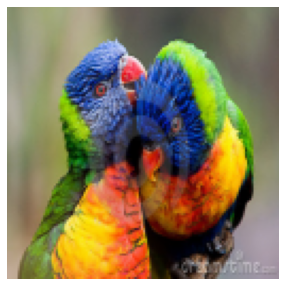

None


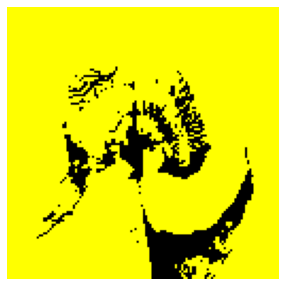

2 clusters None
2 кластера: 0.32204047892681736


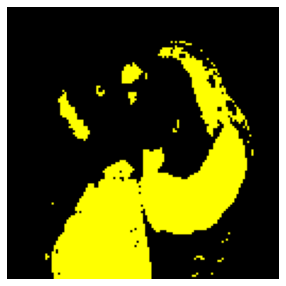

3 clusters None
3 кластера: 0.12079480799893794


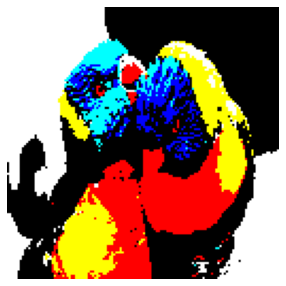

10 clusters None
10 кластеров: 0.3225163793427501


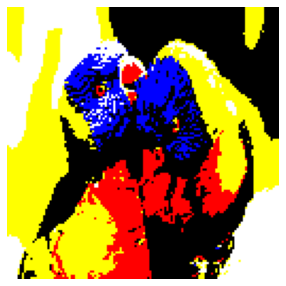

20 clusters None
20 кластеров: 0.3310967039315513


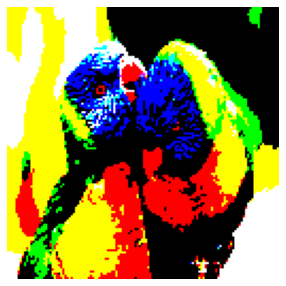

1000 clusters None
1000 кластеров: 0.32642793511849727


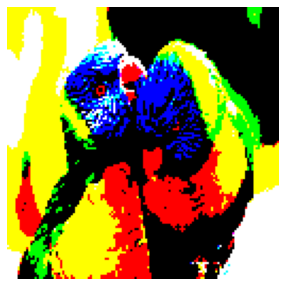

10000 clusters None
10000 кластеров: 0.32630604025338866


In [ ]:
# мы уменьшили входную картинку из - за нехватки ресурсов
img_new = resize(img, (128,128))
print('AgglomerativeClustering, метрика SSIM')
print(draw_picture(img_new))


print('2 clusters', draw_picture(Agglomerative_clust(img,2)))
print('2 кластера:', ssim(img_new, Agglomerative_clust(img,2), multichannel=True))

print('3 clusters', draw_picture(Agglomerative_clust(img,3)))
print('3 кластера:', ssim(img_new, Agglomerative_clust(img,3), multichannel=True))

print('10 clusters', draw_picture(Agglomerative_clust(img,10)))
print('10 кластеров:', ssim(img_new, Agglomerative_clust(img,10), multichannel=True))

print('20 clusters', draw_picture(Agglomerative_clust(img,20)))
print('20 кластеров:', ssim(img_new, Agglomerative_clust(img,20), multichannel=True))

print('1000 clusters', draw_picture(Agglomerative_clust(img,1000)))
print('1000 кластеров:', ssim(img_new, Agglomerative_clust(img,1000), multichannel=True))

print('10000 clusters', draw_picture(Agglomerative_clust(img,10000)))
print('10000 кластеров:', ssim(img_new, Agglomerative_clust(img,10000), multichannel=True))

In [ ]:
print('Сравним 20 кластеров агломеративной кластеризации и kmeans новой картинки')
print('KMeans:',ssim(img_new, KMeans_clast(img_new,20), multichannel=True))
print('AgglomerativeClustering', ssim(img_new, Agglomerative_clast(img,20), multichannel=True))

Сравним 20 кластеров агломеративной кластеризации и kmeans новой картинки
KMeans: 0.3217265695843639
AgglomerativeClustering 0.3310967039315513


**Вывод:**

Алгомеративная кластеризация требует много ресурсов

Если урезать размер входной картинки, то она проигрывает kmeans в точности при одинаковом количестве кластеров

# 4. Не баян, а классика

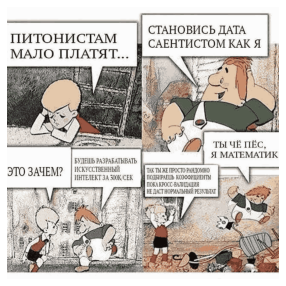

20 clusters in KMeans None


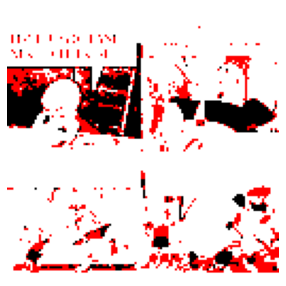

5 clusters in AgglomerativeClustering None


In [ ]:
mem = cv2.imread('/mem.jpg')
draw_picture(mem)
print('20 clusters in KMeans', draw_picture(KMeans_clust(mem,20)))
print('5 clusters in AgglomerativeClustering', draw_picture(Agglomerative_clust(mem, 5)))

# 2 - Уменьшение размерности помогает классификации лиц 

Используя методы уменьшения размерности признаков, можно решать  решите с задачу классификации лиц знаменитостей


In [ ]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.datasets import fetch_lfw_people
lfw_people = fetch_lfw_people(min_faces_per_person=30, resize=1.0)
# эту строчку менять нельзя, ресайзить нельзя

In [ ]:
from sklearn.model_selection import train_test_split
X = lfw_people.data
y = lfw_people.target
names = lfw_people.target_names

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X.shape # 2370 лиц, каждый из них представляется вектором размера 11750

(2370, 11750)

In [ ]:
y.shape

(2370,)

In [ ]:
names[8] # в y лежат номера, а names переводит номер в имя

'George W Bush'

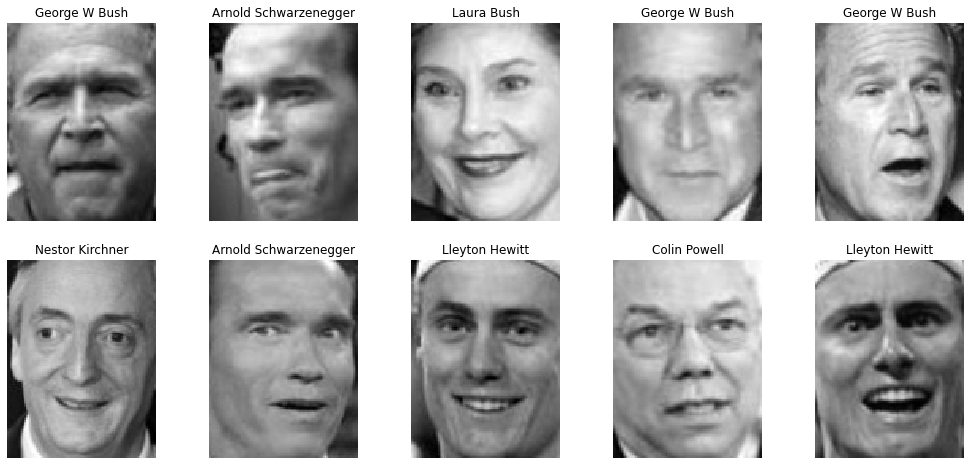

In [ ]:
import matplotlib.pyplot as plt
def plot_image(image_id):
    # функция рисует изображение номер image_id
    plt.title(names[y[image_id]])
    plt.imshow(255 - lfw_people['images'][image_id], cmap=plt.cm.gray_r, interpolation='nearest')
    
def plot_grid(image_ids, nrows, ncols):
    # функция рисует изображения с id равными image_ids
    # в nrows рядов и ncols столбцов
    fig = plt.gcf()
    fig.set_size_inches(17.5, 8)
    for index, example_id in enumerate(image_ids):
        plt.subplot(nrows, ncols, index + 1)
        plot_image(example_id)
        plt.axis('off')

plot_grid(range(10), nrows=2, ncols=5)# первые 10 лиц

# 1. Без уменьшения размерности

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model_original_dimension = LogisticRegression().fit(X_train, y_train)

In [ ]:
accuracy_score(y_test,model_original_dimension.predict(X_test))

0.6729957805907173

# 2. C уменьшением размерности

In [ ]:
from sklearn.decomposition import PCA
pca_model = PCA(n_components=1800).fit(X_train)
X_train_pca = pca_model.transform(X_train)
model_PCA = LogisticRegression().fit(X_train_pca, y_train)

accuracy_score(y_test,model_PCA.predict(pca_model.transform(X_test)))

0.7151898734177216

# 3. Константное предсказание

In [ ]:
np.argmax(np.unique(y, return_counts=True)[1])

8

In [ ]:
accuracy_score(y_test,(np.ones(len(y_test))*8).astype(int))

0.23839662447257384

## Модели классификации как с уменьшением размерности PCA, так и без нее сильно выигрывает у константного алгоритма

# 4. Примеры ошибок

Правильный ответ


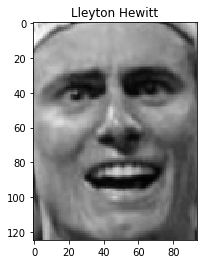

In [ ]:
print("Правильный ответ")
plot_image(y_test[0])

Модель


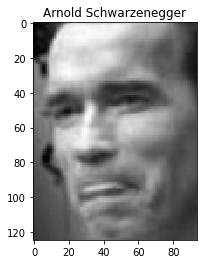

In [ ]:
print("Модель")
plot_image(model_PCA.predict(pca_model.transform(X_test))[0])